#Prodigy Task 2


Step 1: Setup and Load

In [1]:
# Step 1: Imports and Data Loading
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset from the official URL
url = 'https://raw.githubusercontent.com/Prodigy-InfoTech/data-science-datasets/main/Task%202/train.csv'
df = pd.read_csv(url)

print("Dataset loaded successfully.")

Dataset loaded successfully.


Step 2: Quick Inspection

In [2]:
print("--- Data Info ---")
df.info()
print("\n--- Missing Values ---")
print(df.isnull().sum())

--- Data Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB

--- Missing Values ---
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin       

Step 3: Decisive Data Cleaning

In [3]:
# Handling Missing 'Age': The age distribution is skewed, so the median is a better
# measure than the mean to fill missing values as it's less sensitive to outliers.
df['Age'].fillna(df['Age'].median(), inplace=True)


df.drop(columns='Cabin', inplace=True)

# Handling Missing 'Embarked': Only two rows are missing.

df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Final check to confirm all missing values are handled
print("--- Missing Values After Cleaning ---")
print(df.isnull().sum())

--- Missing Values After Cleaning ---
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


/tmp/ipython-input-3826364057.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
/tmp/ipython-input-3826364057.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try

Step 4: Visualize and Analyze (The Story)

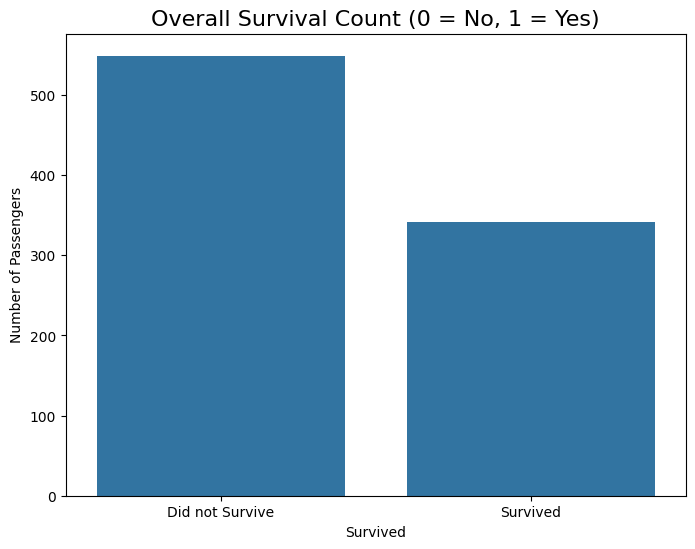

In [7]:
# Visualization 1: Overall Survival Count
plt.figure(figsize=(8, 6))
sns.countplot(x='Survived', data=df)
plt.title('Overall Survival Count (0 = No, 1 = Yes)', fontsize=16)
plt.xticks([0, 1], ['Did not Survive', 'Survived'])
plt.ylabel('Number of Passengers')
plt.savefig('survival_count.png')
plt.show()

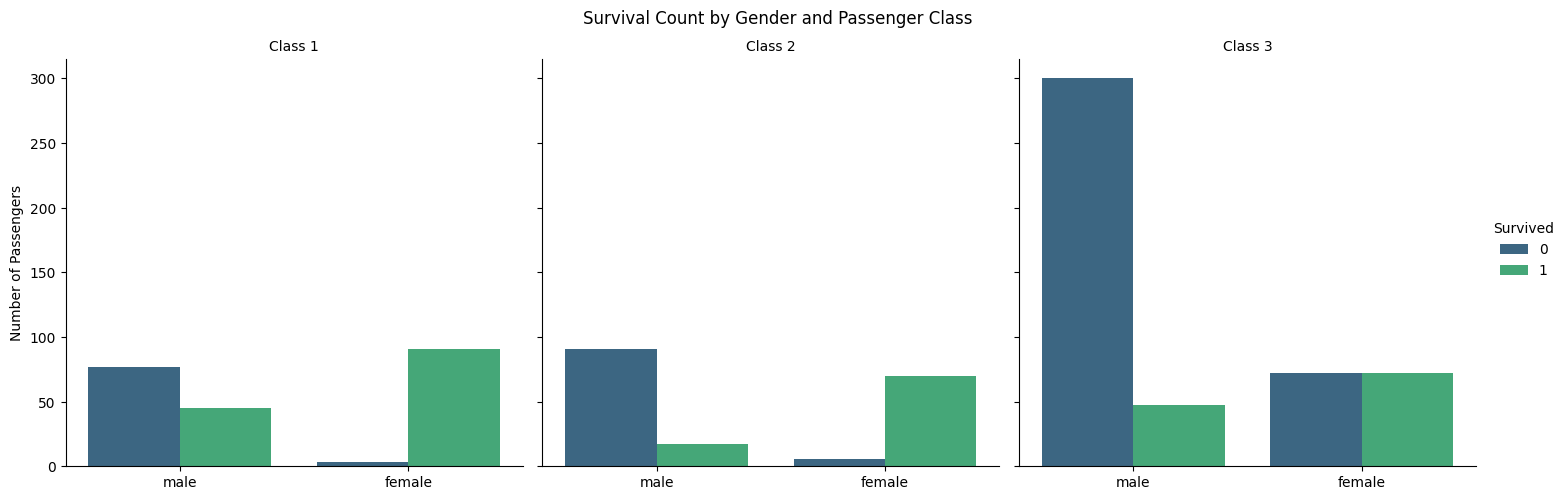

In [8]:
# Visualization 2: Survival by Passenger Class and Gender
# This plot shows survival counts for each gender within each passenger class.
g = sns.catplot(x='Sex', col='Pclass', data=df, kind='count', hue='Survived', palette='viridis')
g.fig.suptitle('Survival Count by Gender and Passenger Class', y=1.03)
g.set_axis_labels("", "Number of Passengers")
g.set_titles("Class {col_name}")
plt.savefig('class_gender_survival.png')
plt.show()

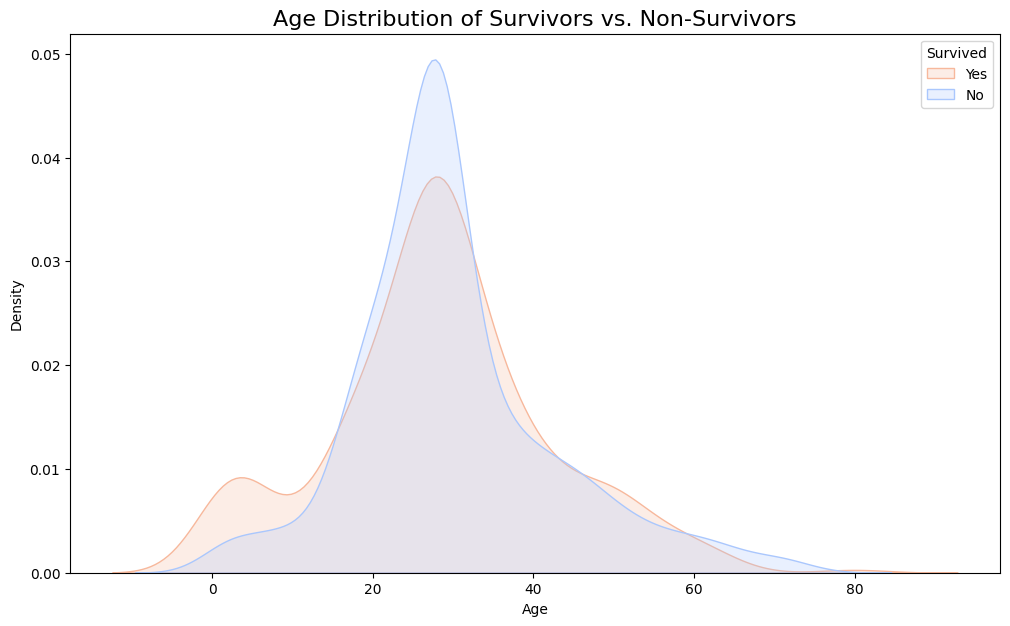

In [11]:
# Visualization 3: Age Distribution of Survivors vs. Non-Survivors
plt.figure(figsize=(12, 7))
sns.kdeplot(data=df, x='Age', hue='Survived', fill=True, common_norm=False, palette='coolwarm')
plt.title('Age Distribution of Survivors vs. Non-Survivors', fontsize=16)
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend(title='Survived', labels=['Yes', 'No'])
plt.savefig('age_distribution.png')
plt.show()

## Key Findings from EDA:

* **Survival Rate:** Far more people died than survived. The odds were against the average passenger.
* **Gender Impact:** Women had a drastically higher chance of survival than men across all passenger classes. This confirms the "women and children first" protocol was followed to some extent.
* **Class Impact:** First-class passengers had a much higher survival rate compared to third-class passengers. Wealth and status were a major factor.
* **Age Impact:** A noticeable peak in the survival distribution for young children suggests that they were prioritized during the rescue.